<a href="https://colab.research.google.com/github/soumik12345/Zero-DCE/blob/master/notebooks/Zero_DCE_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Nov 15 19:02:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/soumik12345/Zero-DCE
%cd Zero-DCE

Cloning into 'Zero-DCE'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 145 (delta 83), reused 85 (delta 35), pack-reused 0
Receiving objects: 100% (145/145), 3.79 MiB | 17.95 MiB/s, done.
Resolving deltas: 100% (83/83), done.
/content/Zero-DCE


In [4]:
!pip install -qq wandb

     |████████████████████████████████| 1.8MB 22.4MB/s 
     |████████████████████████████████| 163kB 45.2MB/s 
     |████████████████████████████████| 133kB 52.7MB/s 
     |████████████████████████████████| 102kB 12.4MB/s 
     |████████████████████████████████| 102kB 12.5MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 


In [3]:
import random
from glob import glob
from zero_dce import (
    download_dataset, init_wandb,
    Trainer, plot_result
)

In [6]:
download_dataset(dataset_tag='dark_face')

Downloading...
From: https://drive.google.com/uc?id=11KaOhxcOh68_NyZwacBoabEJ6FgPCsnQ
To: /content/Zero-DCE/DarkPair.zip
580MB [00:02, 230MB/s]


Unpacking Dataset
Done!!!


In [ ]:
trainer = Trainer()
trainer.build_model(pretrain_weights='./model200_dark_faces.pth')

In [ ]:
image_files = glob('./Low/*.png')
random.shuffle(image_files)

In [ ]:
for image_file in image_files[:5]:
    # Testing on resized images because I'm gareeb
    image, enhanced = trainer.infer_gpu(image_file, image_resize_factor=1)
    plot_result(image, enhanced)

In [14]:
image_files = glob('./Low/*.png')
random.shuffle(image_files)

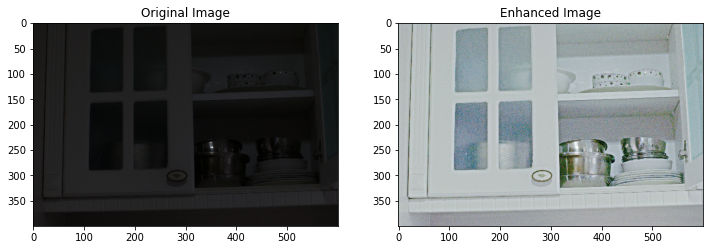

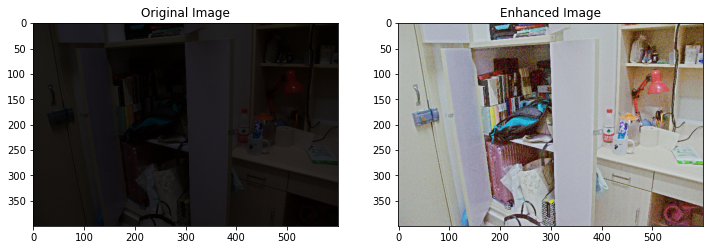

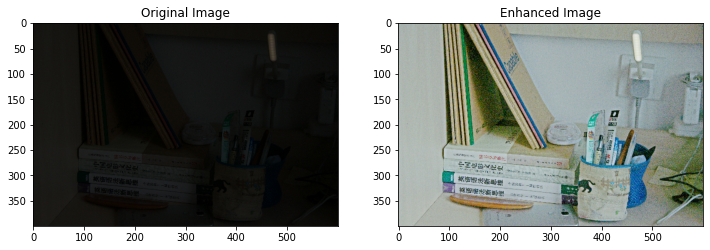

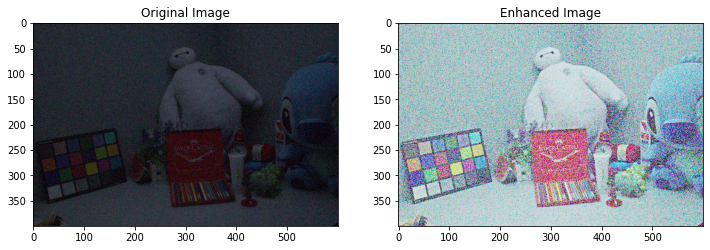

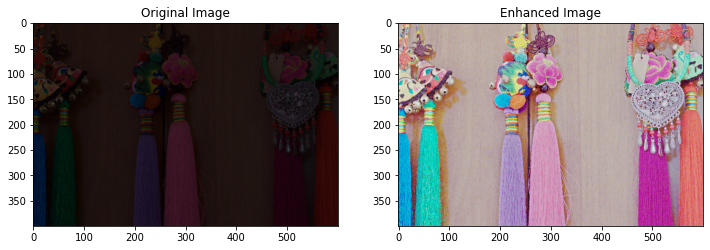

In [15]:
for image_file in image_files[:5]:
    # Testing on resized images because I'm gareeb
    image, enhanced = trainer.infer_gpu(image_file, image_resize_factor=1)
    plot_result(image, enhanced)